## Timeline Analysis

In [1]:
import os
import subprocess
import datetime
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql import functions as F

from pyspark.sql.types import *

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# import pyspark functions and data types
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, ArrayType, DoubleType, BooleanType
from pyspark.sql.functions import col, element_at, count, countDistinct, avg, split, array_contains, isnan, when

In [3]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [4]:
gcs_folder = 'gs://msca-bdp-students-bucket/shared_data/esmyslovskikh/sample_df.parquet/'

df = spark.read \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .parquet(gcs_folder)

In [5]:
df.cache()

commit_author,commit_time,repo_name,subject,message,language_new,license
Andrey Koltsov,1542576574,emc-mongoose/console,* Add syntex high...,* Add syntex high...,CSS,mit
Andrey Koltsov,1547533949,emc-mongoose/console,Add prototype of ...,Add prototype of ...,CSS,mit
grantj-re3,1616050601,grantj-re3/Flinde...,Add utility to cr...,Add utility to cr...,Ruby,bsd-3-clause
Tim Serong,1406035213,GregMeno/test,Support SUSE buil...,Support SUSE buil...,ApacheConf,mit
ASMlover,1416923576,ASMlover/study,updated the confi...,updated the confi...,Assembly,bsd-2-clause
weolar,1430239082,xzmagic/src,合并webkit官网对backgr...,合并webkit官网对backgr...,Assembly,gpl-2.0
fenghm,1340527644,bingo-open-source...,add emptyElement ...,add emptyElement ...,Java,apache-2.0
GitHub,1662517622,envylabs/faraday-...,build(deps): bump...,build(deps): bump...,Ruby,mit
Wille,1483959089,villeristi/vue.js...,Merge branch 'rel...,Merge branch 'rel...,CSS,mit
Roman Telezhynskyi,1487842639,dismine/Valentina...,Refactoring. Prep...,Refactoring. Prep...,Batchfile,gpl-3.0


In [6]:
df.count()

2451

In [7]:
null_values = df.select([count(when(isnan(c)| col(c).isNull(), c)).alias(c) for c in df.columns])
null_values.show()

+-------------+-----------+---------+-------+-------+------------+-------+
|commit_author|commit_time|repo_name|subject|message|language_new|license|
+-------------+-----------+---------+-------+-------+------------+-------+
|            0|          0|        0|      0|      0|          41|      0|
+-------------+-----------+---------+-------+-------+------------+-------+



In [8]:
df = df.withColumn("commit_time", col("commit_time").cast("timestamp"))
df = df.withColumn("commit_day", split(df["commit_time"], " ")[0])
# year column
df = df.withColumn("commit_year", split(df["commit_day"], "-")[0])
#df = df.withColumn("commit_time", col("commit_time").cast("int"))
df = df.withColumn("commit_year", col("commit_year").cast(IntegerType()))
df.cache()

commit_author,commit_time,repo_name,subject,message,language_new,license,commit_day,commit_year
Andrey Koltsov,2018-11-18 21:29:34,emc-mongoose/console,* Add syntex high...,* Add syntex high...,CSS,mit,2018-11-18,2018
Andrey Koltsov,2019-01-15 06:32:29,emc-mongoose/console,Add prototype of ...,Add prototype of ...,CSS,mit,2019-01-15,2019
grantj-re3,2021-03-18 06:56:41,grantj-re3/Flinde...,Add utility to cr...,Add utility to cr...,Ruby,bsd-3-clause,2021-03-18,2021
Tim Serong,2014-07-22 13:20:13,GregMeno/test,Support SUSE buil...,Support SUSE buil...,ApacheConf,mit,2014-07-22,2014
ASMlover,2014-11-25 13:52:56,ASMlover/study,updated the confi...,updated the confi...,Assembly,bsd-2-clause,2014-11-25,2014
weolar,2015-04-28 16:38:02,xzmagic/src,合并webkit官网对backgr...,合并webkit官网对backgr...,Assembly,gpl-2.0,2015-04-28,2015
fenghm,2012-06-24 08:47:24,bingo-open-source...,add emptyElement ...,add emptyElement ...,Java,apache-2.0,2012-06-24,2012
GitHub,2022-09-07 02:27:02,envylabs/faraday-...,build(deps): bump...,build(deps): bump...,Ruby,mit,2022-09-07,2022
Wille,2017-01-09 10:51:29,villeristi/vue.js...,Merge branch 'rel...,Merge branch 'rel...,CSS,mit,2017-01-09,2017
Roman Telezhynskyi,2017-02-23 09:37:19,dismine/Valentina...,Refactoring. Prep...,Refactoring. Prep...,Batchfile,gpl-3.0,2017-02-23,2017


In [9]:
df.printSchema()

root
 |-- commit_author: string (nullable = true)
 |-- commit_time: timestamp (nullable = true)
 |-- repo_name: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- message: string (nullable = true)
 |-- language_new: string (nullable = true)
 |-- license: string (nullable = true)
 |-- commit_day: string (nullable = true)
 |-- commit_year: integer (nullable = true)



In [10]:
df_pd = df.toPandas()

In [11]:
df_pd.dtypes

commit_author            object
commit_time      datetime64[ns]
repo_name                object
subject                  object
message                  object
language_new             object
license                  object
commit_day               object
commit_year               int32
dtype: object

In [12]:
df_pd['commit_day']= pd.to_datetime(df_pd['commit_day'])
#df_pd['commit_year']= pd.to_numeric(df_pd['commit_year'])

array([[<AxesSubplot:title={'center':'commit_day'}>]], dtype=object)

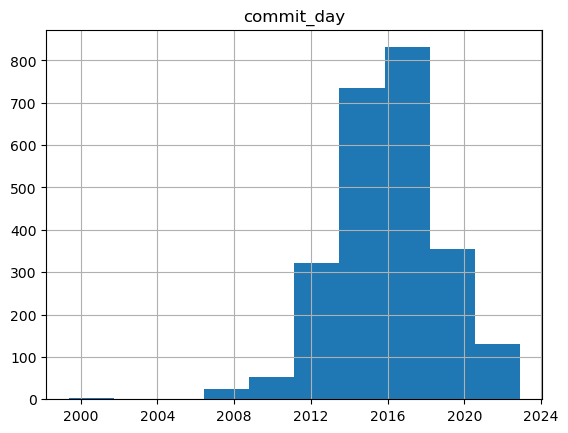

In [13]:
df_pd.hist(column='commit_day')

#### Remove outliers

In [14]:
# we should filter out all commits before 2008
df_pd = df_pd.loc[(df_pd['commit_day'] >= '2008-01-01')]

#### Daily commits

array([[<AxesSubplot:title={'center':'commit_day'}>]], dtype=object)

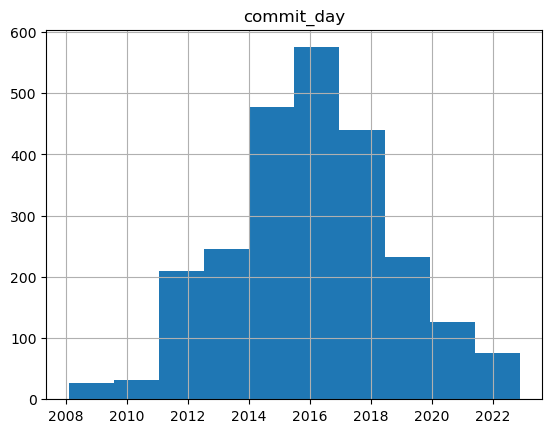

In [15]:
df_pd.hist(column='commit_day')

In [16]:
df = df.filter(df['commit_day']>= '2008-01-01')
df.cache()

commit_author,commit_time,repo_name,subject,message,language_new,license,commit_day,commit_year
Andrey Koltsov,2018-11-18 21:29:34,emc-mongoose/console,* Add syntex high...,* Add syntex high...,CSS,mit,2018-11-18,2018
Andrey Koltsov,2019-01-15 06:32:29,emc-mongoose/console,Add prototype of ...,Add prototype of ...,CSS,mit,2019-01-15,2019
grantj-re3,2021-03-18 06:56:41,grantj-re3/Flinde...,Add utility to cr...,Add utility to cr...,Ruby,bsd-3-clause,2021-03-18,2021
Tim Serong,2014-07-22 13:20:13,GregMeno/test,Support SUSE buil...,Support SUSE buil...,ApacheConf,mit,2014-07-22,2014
ASMlover,2014-11-25 13:52:56,ASMlover/study,updated the confi...,updated the confi...,Assembly,bsd-2-clause,2014-11-25,2014
weolar,2015-04-28 16:38:02,xzmagic/src,合并webkit官网对backgr...,合并webkit官网对backgr...,Assembly,gpl-2.0,2015-04-28,2015
fenghm,2012-06-24 08:47:24,bingo-open-source...,add emptyElement ...,add emptyElement ...,Java,apache-2.0,2012-06-24,2012
GitHub,2022-09-07 02:27:02,envylabs/faraday-...,build(deps): bump...,build(deps): bump...,Ruby,mit,2022-09-07,2022
Wille,2017-01-09 10:51:29,villeristi/vue.js...,Merge branch 'rel...,Merge branch 'rel...,CSS,mit,2017-01-09,2017
Roman Telezhynskyi,2017-02-23 09:37:19,dismine/Valentina...,Refactoring. Prep...,Refactoring. Prep...,Batchfile,gpl-3.0,2017-02-23,2017


In [17]:
df_grouped = df.groupby('commit_day').agg(count('*'))
df_grouped = df_grouped.withColumn("commit_day", col("commit_day").cast("timestamp"))
df_grouped = df_grouped.withColumn("count(1)", col("count(1)").cast(IntegerType()))
df_grouped.cache()

commit_day,count(1)
2016-08-17 00:00:00,1
2021-11-03 00:00:00,1
2017-05-14 00:00:00,1
2017-12-05 00:00:00,2
2014-12-13 00:00:00,1
2015-05-01 00:00:00,1
2016-04-22 00:00:00,2
2015-02-09 00:00:00,2
2014-12-11 00:00:00,2
2014-07-14 00:00:00,1


In [18]:
df_grouped.printSchema()

root
 |-- commit_day: timestamp (nullable = true)
 |-- count(1): integer (nullable = false)



In [19]:
df_grouped_pd = df_grouped.toPandas()
daily_commits = pd.DataFrame(df_grouped_pd.groupby(['commit_day']).sum()['count(1)']).reset_index()
daily_commits = daily_commits.rename({"count(1)": "Commits", "commit_day": "Date"}, axis=1)
daily_commits

,Date,Commits
0,2008-02-03,1
1,2008-02-05,1
2,2008-02-08,1
3,2008-02-21,1
4,2008-03-09,1
...,...,...
1670,2022-10-04,1
1671,2022-10-10,1
1672,2022-10-12,1
1673,2022-11-02,1


In [20]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme(style="darkgrid")

<AxesSubplot:xlabel='Date', ylabel='Commits'>

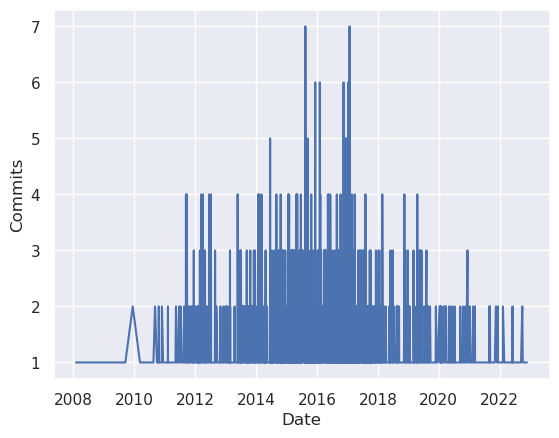

In [21]:
sns.lineplot(x="Date", y="Commits",
             markers=True,
             data=daily_commits)

In [22]:
df_grouped.unpersist()

commit_day,count(1)
2015-02-09 00:00:00,2
2020-06-08 00:00:00,1
2014-12-11 00:00:00,2
2017-05-14 00:00:00,1
2016-07-06 00:00:00,1
2017-12-05 00:00:00,2
2014-07-14 00:00:00,1
2016-08-17 00:00:00,1
2015-02-26 00:00:00,3
2014-12-13 00:00:00,1


#### Yearly commits

In [23]:
df_grouped_y = df.groupby('commit_year').agg(count('*'))
df_grouped_y = df_grouped_y.withColumn("count(1)", col("count(1)").cast(IntegerType()))
df_grouped_y.cache()

commit_year,count(1)
2018,182
2015,395
2022,40
2013,194
2014,277
2019,145
2020,97
2012,154
2009,13
2016,392


In [24]:
df_grouped_pd_y = df_grouped_y.toPandas()
yearly_commits = pd.DataFrame(df_grouped_pd_y.groupby(['commit_year']).sum()['count(1)']).reset_index()
yearly_commits = yearly_commits.rename({"count(1)": "Commits", "commit_year": "Year"}, axis=1)
yearly_commits

,Year,Commits
0,2008,16
1,2009,13
2,2010,26
3,2011,108
4,2012,154
5,2013,194
6,2014,277
7,2015,395
8,2016,392
9,2017,337


<AxesSubplot:xlabel='Year', ylabel='Commits'>

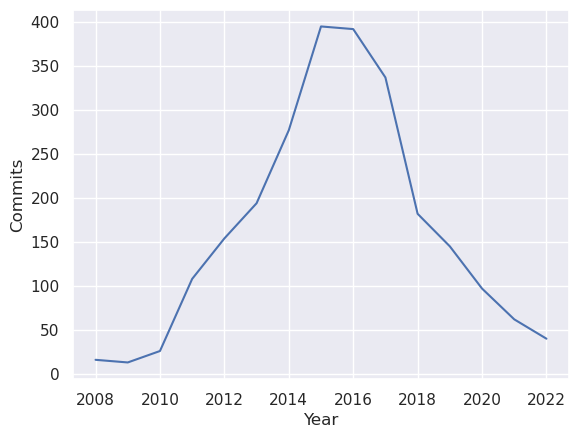

In [25]:
sns.lineplot(x="Year", y="Commits",
             data=yearly_commits)

In [26]:
df_grouped_y.unpersist()

commit_year,count(1)
2018,182
2015,395
2022,40
2013,194
2014,277
2019,145
2020,97
2012,154
2009,13
2016,392


In [27]:
df.unpersist()

commit_author,commit_time,repo_name,subject,message,language_new,license,commit_day,commit_year
Andrey Koltsov,2018-11-18 21:29:34,emc-mongoose/console,* Add syntex high...,* Add syntex high...,CSS,mit,2018-11-18,2018
Andrey Koltsov,2019-01-15 06:32:29,emc-mongoose/console,Add prototype of ...,Add prototype of ...,CSS,mit,2019-01-15,2019
grantj-re3,2021-03-18 06:56:41,grantj-re3/Flinde...,Add utility to cr...,Add utility to cr...,Ruby,bsd-3-clause,2021-03-18,2021
Tim Serong,2014-07-22 13:20:13,GregMeno/test,Support SUSE buil...,Support SUSE buil...,ApacheConf,mit,2014-07-22,2014
ASMlover,2014-11-25 13:52:56,ASMlover/study,updated the confi...,updated the confi...,Assembly,bsd-2-clause,2014-11-25,2014
weolar,2015-04-28 16:38:02,xzmagic/src,合并webkit官网对backgr...,合并webkit官网对backgr...,Assembly,gpl-2.0,2015-04-28,2015
fenghm,2012-06-24 08:47:24,bingo-open-source...,add emptyElement ...,add emptyElement ...,Java,apache-2.0,2012-06-24,2012
GitHub,2022-09-07 02:27:02,envylabs/faraday-...,build(deps): bump...,build(deps): bump...,Ruby,mit,2022-09-07,2022
Wille,2017-01-09 10:51:29,villeristi/vue.js...,Merge branch 'rel...,Merge branch 'rel...,CSS,mit,2017-01-09,2017
Roman Telezhynskyi,2017-02-23 09:37:19,dismine/Valentina...,Refactoring. Prep...,Refactoring. Prep...,Batchfile,gpl-3.0,2017-02-23,2017


In [28]:
import datetime
import pytz

datetime.datetime.now(pytz.timezone('US/Central')).strftime("%a, %d %B %Y %H:%M:%S")

'Fri, 08 March 2024 14:38:34'